In [1]:
import os, sys
import torch

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1


if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig, EmbeddingStrategy
from src.experiments import ExperimentSuite
from src.utils import ExperimentUtils



def tune_epochs(strategy, file_name, cells):
    url = "saved_experiments" + "/" + file_name
    base_config_balance_5_agents = PPOConfig(
        n_agents=5, scenario_name='balance', decentralized_execution=True, n_iters=100,
        max_steps=200, strategy=strategy, profile=False, mlp_core_depth=2
    )

    param_grid = {
        "mlp_core_num_cells": cells,
    }
    my_device = torch.device("cpu")
    suite = ExperimentSuite(base_config=base_config_balance_5_agents, param_grid=param_grid, name="test_all", device=my_device)
    suite.run_all_confidence(k=10)
    suite_utils = ExperimentUtils(path=url, experiment_suite=suite)
    suite_utils.save_df_to_file()
    suite_utils.plot_experiment_suite_df()
    print(suite_utils.create_table_with_confidence())

In [3]:
tune_epochs(EmbeddingStrategy.CONCAT, "concat_tune_cells_16_32_64.csv", cells=[16,32,64])

2025-07-16 11:21:22,679 [torchrl][INFO] check_env_specs succeeded!


KeyboardInterrupt: 

2025-06-06 20:53:11,433 [torchrl][INFO] check_env_specs succeeded!
2025-06-06 20:53:11,481 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 93.77841186523438: 100%|██████████| 100/100 [02:50<00:00,  1.70s/it] 
2025-06-06 20:56:01,891 [torchrl][INFO] Training time: 79.49 seconds
2025-06-06 20:56:01,894 [torchrl][INFO] macs: 54.02 MMac  Params: 27.01 k
2025-06-06 20:56:02,892 [torchrl][INFO] check_env_specs succeeded!
2025-06-06 20:56:02,933 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 96.55313873291016: 100%|██████████| 100/100 [02:49<00:00,  1.70s/it]  
2025-06-06 20:58:52,500 [torchrl][INFO] Training time: 79.79 seconds
2025-06-06 20:58:52,502 [torchrl][INFO] macs: 54.02 MMac  Params: 27.01 k
2025-06-06 20:58:53,489 [torchrl][INFO] check_env_specs succeeded!
2025-06-06 20:58:53,530 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 98.63465881347656: 100%|██████████| 100/100 [02:53<00:00,  1.73s/it] 
2025-06-06 21:01:46,540 [torchrl][I

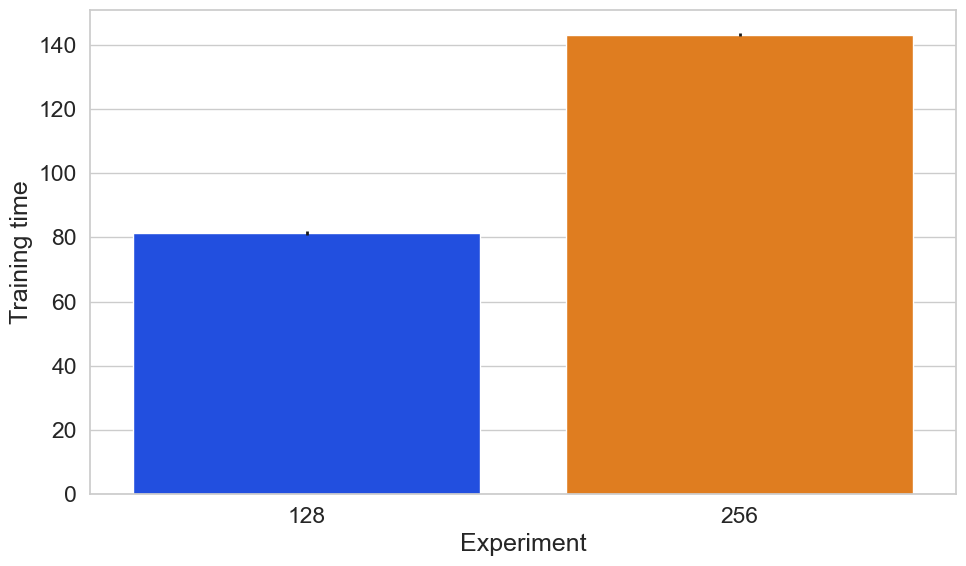

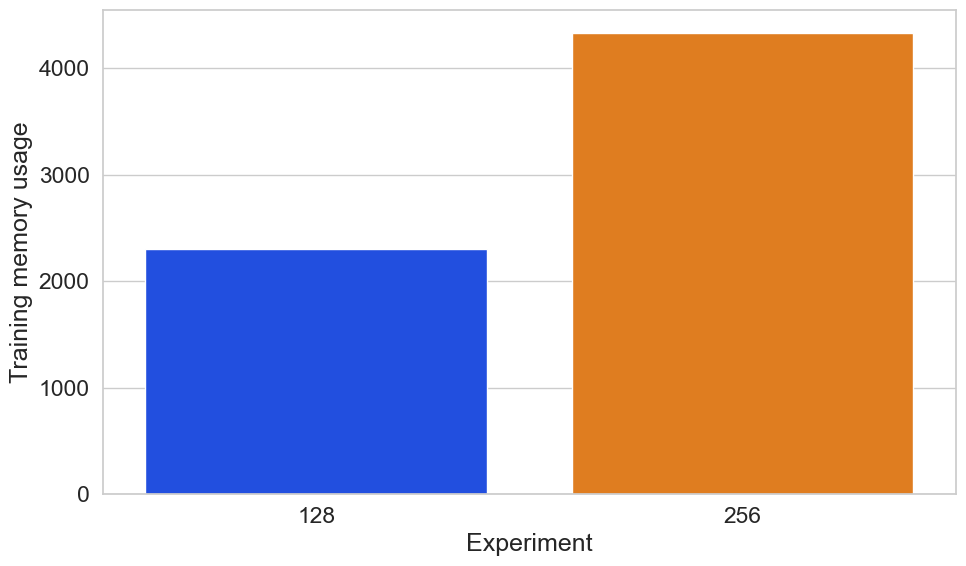

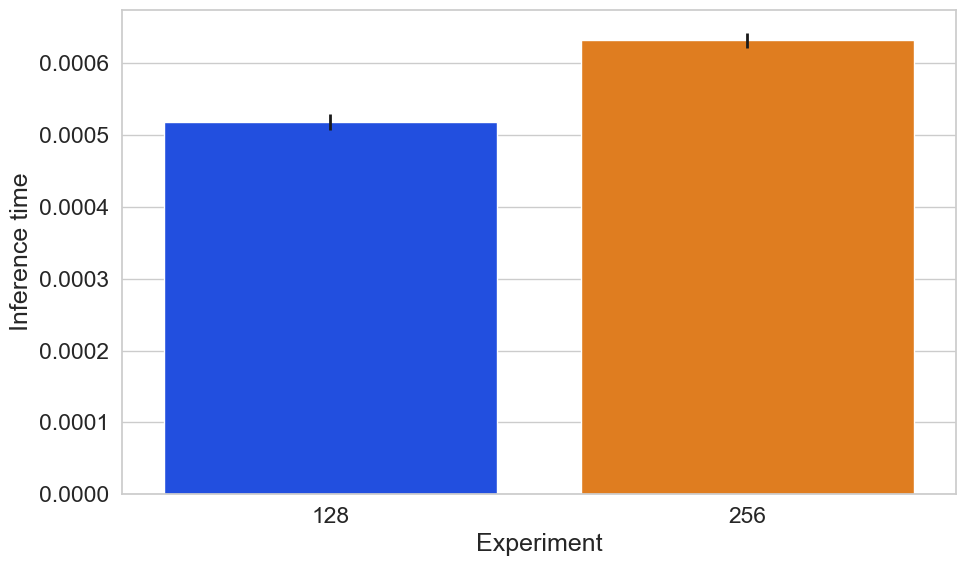

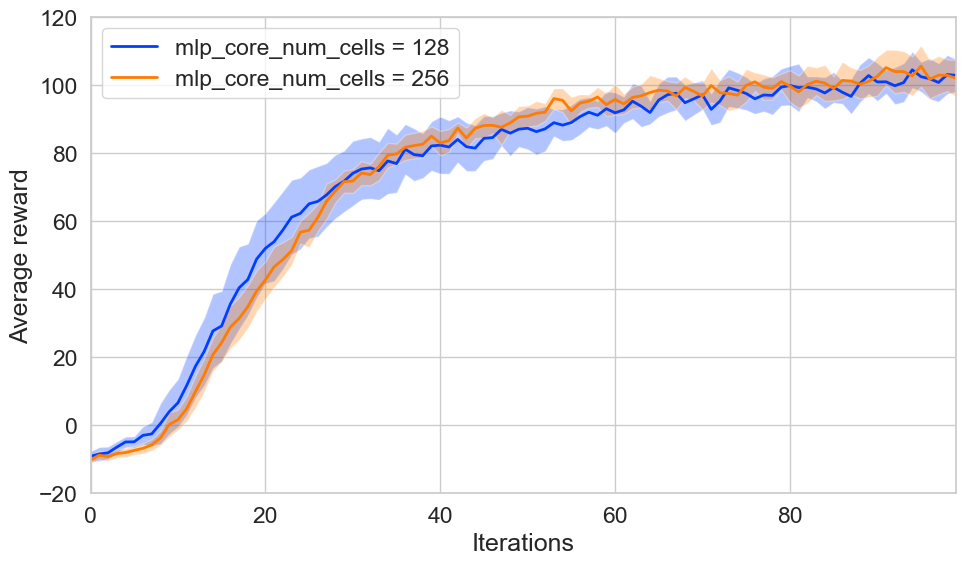

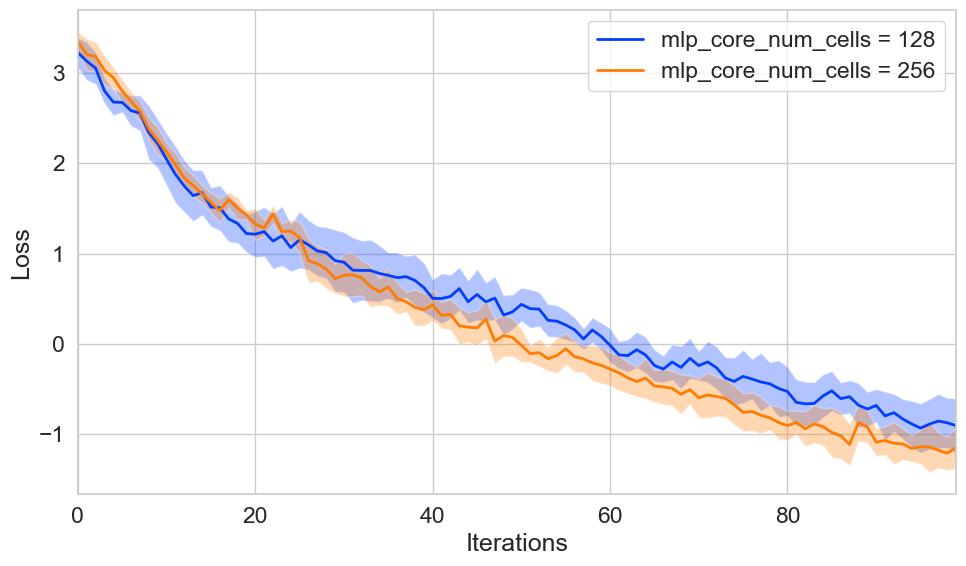

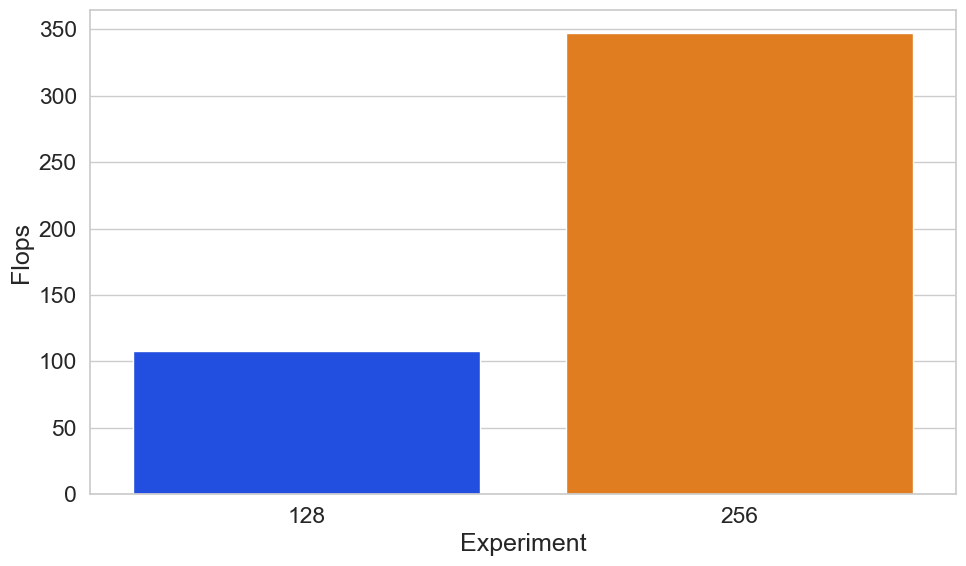

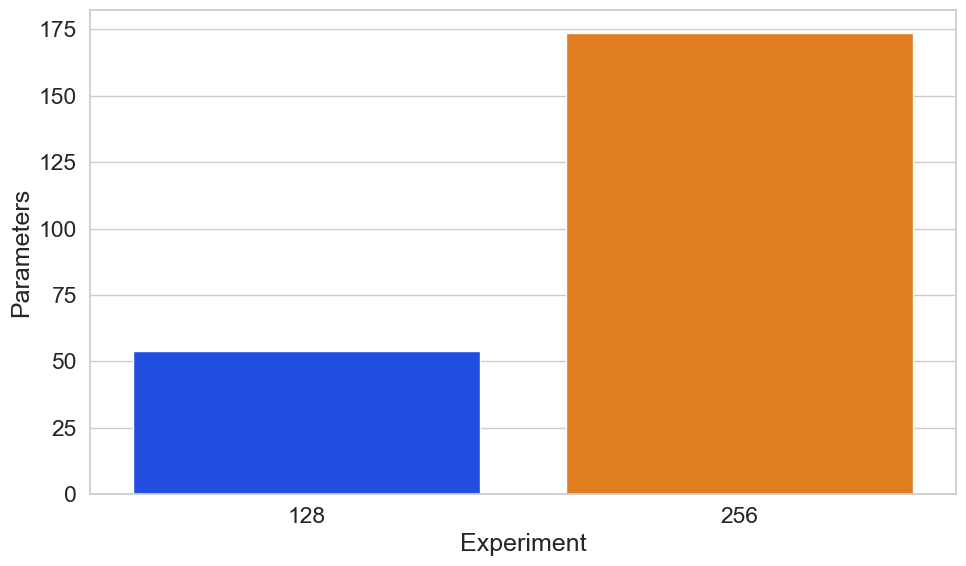

                 Experiment  training_time training_memory_usage  \
0  mlp_core_num_cells = 128   81.43 ± 0.68   2.30e+03 ± 0.00e+00   
1  mlp_core_num_cells = 256  143.17 ± 0.50   4.33e+03 ± 0.00e+00   

        inference_time   mean_rewards          loss                flops  \
0  5.18e-04 ± 1.14e-05  102.84 ± 4.76  -0.91 ± 0.30  1.08e+02 ± 0.00e+00   
1  6.32e-04 ± 1.01e-05  102.01 ± 5.33  -1.15 ± 0.22  3.47e+02 ± 0.00e+00   

            parameters  
0  5.40e+01 ± 0.00e+00  
1  1.74e+02 ± 0.00e+00  


In [3]:
tune_epochs(EmbeddingStrategy.CONCAT, "concat_tune_cells_128_256.csv", cells=[128,256])